<a href="https://colab.research.google.com/github/Bhupendra-glitch/MNIST-/blob/main/MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**


Importing the Depedancies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


Training Data  = 60000 Images
Test Data  = 10000 Images


Image dimension --> 28 x 28

Grayscale Image -->  1 channel

In [ ]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


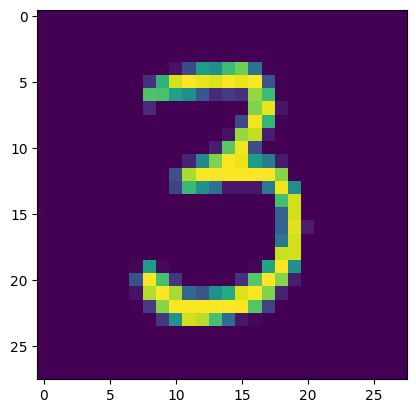

3


In [ ]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corrsponding lables
print(Y_train[50])

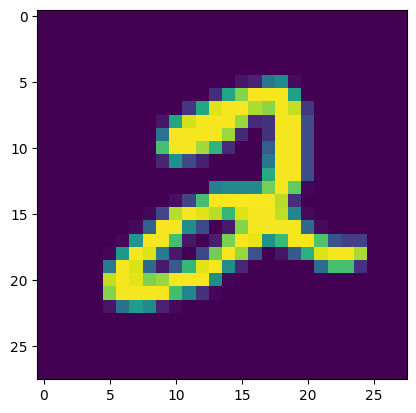

2


In [ ]:
# displaying the image
plt.imshow(X_train[5])
plt.show()

#print the corrsponding lables
print(Y_train[5])

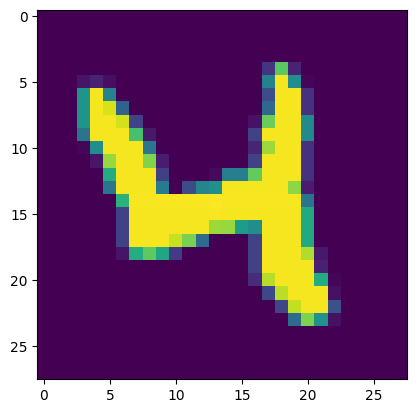

4


In [ ]:
# displaying the image
plt.imshow(X_train[20])
plt.show()

#print the corrsponding lables
print(Y_train[20])

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use the lables as such , or we can also apply One Hot Encoding

All the iamges hv same dimesion in the dataset, If not we have to resize all the iamges

In [ ]:
# scaling the values
x_train = X_train/255
x_test = X_test/255

In [ ]:
'''0/255 = 0
255 /255 = 1

so the
max = 1
min  = 0
'''

'0/255 = 0 \n255 /255 = 1\n\nso the  \nmax = 1\nmin  = 0\n'

In [ ]:
# printing the 10th iamge
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

Building the Nerural Network


In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Compling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3054 - loss: 4.6510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3575 - loss: 0.4301
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3574 - loss: 0.3053
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3447 - loss: 0.2511
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3326 - loss: 0.2047
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3360 - loss: 0.1797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3234 - loss: 0.1563
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3176 - loss: 0.1446
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2986 - loss: 0.1316
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2806 - loss: 0.1236


Training data accuracy = 35.53%

*Accuracy on Test data:*

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2486 - loss: 0.2131
0.24529999494552612


 Test data accuracy = 24.86%


In [ ]:
print(X_test.shape)

(10000, 28, 28)


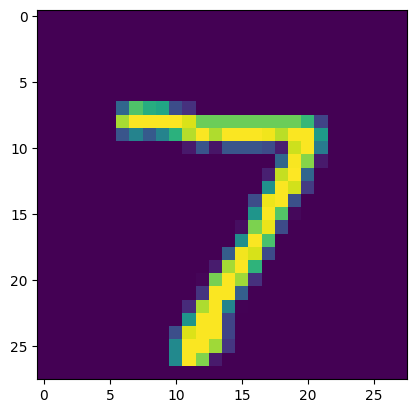

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
Y_pred.shape

(10000, 10)

In [ ]:
print(Y_pred[0])

[0.9999998  1.         1.         1.         1.         1.
 0.99999326 1.         1.         1.        ]


model.pred() gives thr prediction  probability of each class for data point

In [ ]:
# converting the prediction probabilities to class label

In [ ]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

1


In [ ]:
# converting the prediction probabilities to class label for all test data points

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(4), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(9), np.int64(0), np.int64(1), np.int64(4), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0)

In [ ]:
print(Y_pred)

[[0.9999998  1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.97394085 1.         0.99998087 ... 0.9999978  1.         0.9999934 ]
 ...
 [0.9999579  0.9999994  1.         ... 1.         1.         1.        ]
 [1.         0.99999845 1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 0.9942492  1.         1.        ]]


Y_test --> True lables


Y_pred_label = predicted labels

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[970   0   1   0   0   0   3   0   3   3]
 [404 723   0   1   1   0   0   1   5   0]
 [753 182  82   2   2   0   0   3   8   0]
 [986   8   3   6   1   2   0   2   2   0]
 [242 236 177   5 317   0   1   0   3   1]
 [780  23  12  29   4  35   0   0   5   4]
 [897   3   3   7   7   8  29   0   4   0]
 [451 256 106  23  11  14   0 157   4   6]
 [741   8  39  48   3   6   5   2 122   0]
 [922   6   1  24  32   5   1   4   2  12]], shape=(10, 10), dtype=int32)


In [3]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

NameError: name 'plt' is not defined

Building a Predictive System

In [8]:
input_image_path = '/content/3.png'
input_image = cv2.imread(input_image_path)

NameError: name 'cv2' is not defined

In [7]:
type(input_image)

NameError: name 'input_image' is not defined

In [9]:
print(input_image)

NameError: name 'input_image' is not defined